In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
import ee
import geemap
service_account = ' boba-account@boba-430314.iam.gserviceaccount.com '
credentials = ee.ServiceAccountCredentials(service_account,'C:/Users/arj26323/OneDrive - University of Georgia/Documents/GEE AUTH/boba-430314-a19be859bfca.json')

ee.Initialize(credentials)

print(geemap.__version__)

0.34.1


In [3]:
#ADD: PDSI and Evaporation potential!

In [30]:
##Remote sensing data:

# df_rs = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_remotedata.csv')
##Above: needs to be merged with biomass data (df_sum)
# df1 = pd.merge(df_rs, df_sum, how = 'right')

dfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_yr.csv')
dfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_octnov.csv')
dfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_augoct.csv')
dfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_sepoct.csv')
dfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_oct.csv')

dfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

dfw.rename(
    columns={
        'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
        'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
    }, inplace=True
)

dfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

dfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

df9 = pd.merge(dfw, dfv, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

df8 = pd.merge(dfx, dfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

df0 = pd.merge(df9, df8, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')              
               
df1 = pd.merge(df0, dfz, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

# df0 = pd.merge(dfx, dfy, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')

df1['ident'] = df1['ndvi'] * df1['ndvi_augoct'] * df1['ndvi_sepoct']

display(df1)

# for col in df1.columns:
#     print(col)

,Site,Species_Code,Year,Zone,Plot,Latitude,Plant_Biomass,Sample_Size,Longitude,Date,...,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ndvi,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r,ident
0,1,A1,2000,1,1,31.538627,516.324,23,-81.422539,10/11/2000,...,-0.255463,0.050628,0.302182,0.087219,-0.034640,-0.003197,0.074486,-0.255463,0.050628,0.031457
1,3,A1,2000,1,1,31.518920,710.396,20,-81.228956,10/18/2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,A1,2000,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,...,-0.399095,-0.118194,0.294807,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194,0.025622
3,5,A1,2000,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,...,-0.428496,0.027896,0.451001,0.184322,0.138487,-0.061616,0.216527,-0.428496,0.027896,0.091632
4,6,A1,2000,1,1,31.388423,1032.632,20,-81.279792,10/12/2000,...,-0.515328,-0.230591,0.323136,0.115771,-0.011429,0.000000,0.135829,-0.515328,-0.230591,0.027201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,7,A4,2019,2,8,31.334597,2365.620,14,-81.478039,10/8/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2908,7,A4,2019,1,12,31.335017,1821.010,12,-81.478711,10/8/2019,...,-0.650901,-0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,7,A4,2019,1,13,31.334934,2482.584,14,-81.478709,10/8/2019,...,-0.618781,-0.171994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,7,A4,2019,1,16,31.334682,2511.936,17,-81.478564,10/8/2019,...,-0.618781,-0.171994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:

# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_test_NOV2024.csv') ##Changed to single df - 2024
df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

# df1
# for col in df1.columns:
#     print(col)

In [7]:
import glob

# path = r'C:/Users/arj26323/Documents/Xin data/Landsat' 
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)


df_flooding = df.groupby(['Latitude', 'Longitude', 'Year']).apply(
    lambda g: (g['flats'] >= 0.2).mean()).reset_index(name='Percent_flooding'
                                                     )

df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

# df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner')
# df1

In [67]:
##Modeling
# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df1.csv')
# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_test_NOV2024.csv') ##Changed to single df - 2024
df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner') ##BE VERY CAREFUL

df1.rename(columns={'elevation':'Elevation'}, inplace=True)
# df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 
df1 = df1[df1['prcp'].notna()] ##CAREFUL; added 7/11/22
# df1 = df1[df1['Species_Code'] == 'A1'] ##careful here
# df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

#Adding evi
df1['evi'] = ((df1['NIR_band']-df1['Red_band'])*2.5)/(df1['NIR_band']+6*df1['Red_band']+7.5*df1['Blue_band']+1)
df1['evi_peak'] = ((df1['NIR_band_peak']-df1['Red_band_peak'])*2.5)/(df1['NIR_band_peak']+6*df1['Red_band_peak']+7.5*df1['Blue_band_peak']+1)
df1['evi_MarMay'] = ((df1['NIR_band_MarMay']-df1['Red_band_MarMay'])*2.5)/(df1['NIR_band_MarMay']+6*df1['Red_band_MarMay']+7.5*df1['Blue_band_MarMay']+1)
df1['evi_year'] = ((df1['NIR_band_year']-df1['Red_band_year'])*2.5)/(df1['NIR_band_year']+6*df1['Red_band_year']+7.5*df1['Blue_band_year']+1)

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

df1['Date'] = pd.to_datetime(df1.Date, format='%m/%d/%Y')
df1['DOY'] = df1['Date'].dt.strftime('%j') ##Add day of year (DOY) to dataset
# df1['DOY'] = df1['Date'].dt.strftime('%j').astype('float') ##The astype('float') is only for the regression - not for ML 


df1['ndvi_prcp_interaction'] = df1['ndvi'] * df1['prcp_daymMarMay']



xargs=df1[
    [
        'Elevation', 
        'nd_swir2_nir_peak',
        'nd_swir2_nir', 
        'Percent_flooding',
        'dayl_Max', 
        'dayl_Min',
        'srad_peak', 
        'NIR_band_year',
        'flats',
        'wdrvi5_peak', 
        'ndvi_peak', 
        'dayl_daymMarMay', 
        'swe_rolling',
        'nd_g_b_MarMay',
        'savi', 
        'Red_band_year',
        'nd_swir2_nir_year', 
        'SWIR1_band_year',
        'nd_g_b',
        'Blue_band'
    ]
]

yargs=df1['Plant_Biomass'] 

##NEED SEASONAL DAYMET DATA
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'

##Include lag variables (e.g. lag ndvi), precip, temp, more

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

size_x = 0.2
seed = 3
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test



#Old variables:
#         'Percent_flooding',
        
#         'flats',
        
#         'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'evi',
#         'Blue_band','Green_band','Red_band','NIR_band','SWIR1_band','SWIR2_band',
        
#         'ndvi_MarMay', 'nd_swir2_r_MarMay', 'nd_swir2_nir_MarMay', 'nd_g_b_MarMay','wdrvi5_MarMay', 'savi_MarMay', 'evi_MarMay',
#         'Blue_band_MarMay','Green_band_MarMay','Red_band_MarMay','NIR_band_MarMay','SWIR1_band_MarMay','SWIR2_band_MarMay',
        
#         'ndvi_year', 'nd_swir2_r_year', 'nd_swir2_nir_year', 'nd_g_b_year','wdrvi5_year', 'savi_year', 'evi_year',
#         'Blue_band_year','Green_band_year','Red_band_year','NIR_band_year','SWIR1_band_year','SWIR2_band_year',
        
#         'ndvi_peak', 'nd_swir2_r_peak', 'nd_swir2_nir_peak', 'nd_g_b_peak','wdrvi5_peak', 'savi_peak', 'evi_peak',
#         'Blue_band_peak','Green_band_peak','Red_band_peak','NIR_band_peak','SWIR1_band_peak','SWIR2_band_peak',

#         'Elevation', 
        
#         'dayl_daymMarMay', 'prcp_daymMarMay', 'srad_daymMarMay', 'swe_daymMarMay', 'tmax_daymMarMay', 'tmin_daymMarMay',
#         'vp_daymMarMay',
        
#         'dayl_peak', 'prcp_peak', 'srad_peak', 'swe_peak', 'tmax_peak', 'tmin_peak',
#         'vp_peak',        
        
#         'dayl_Min', 'prcp_Min', 'srad_Min', 'swe_Min', 'tmax_Min', 'tmin_Min',
#         'vp_Min',
        
#         'dayl_Max', 'prcp_Max', 'srad_Max', 'swe_Max', 'tmax_Max', 'tmin_Max',
#         'vp_Max',
        
#         'dayl_daymMayOct', 'prcp_daymMayOct', 'srad_daymMayOct', 'swe_daymMayOct', 'tmax_daymMayOct', 'tmin_daymMayOct',
#         'vp_daymMayOct',
        
#         'dayl_rolling', 'prcp_rolling', 'srad_rolling', 'swe_rolling', 'tmax_rolling', 'tmin_rolling',
#         'vp_rolling',
        
#         'pdsi_MarMay', 'spei30d_MarMay', 'spei90d_MarMay', 'spei180d_MarMay', 'spei1y_MarMay', 'spei5y_MarMay',
        
#         'pdsi_gridmet', 'spei30d_gridmet', 'spei90d_gridmet', 'spei180d_gridmet', 'spei1y_gridmet', 'spei5y_gridmet',
        
#         'pdsi_Min', 'spei30d_Min', 'spei90d_Min', 'spei180d_Min', 'spei1y_Min', 'spei5y_Min',

#         'pdsi_Max', 'spei30d_Max', 'spei90d_Max', 'spei180d_Max', 'spei1y_Max', 'spei5y_Max'

In [107]:
#Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Hyperparameters tuned at bottom
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=200, 
                                                                                min_samples_split=10, 
                                                                                min_samples_leaf=2,
                                                                                max_depth=30, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')

Mean Absolute Error: 322.57555116066135
Mean Squared Error: 273453.1448618975
Root Mean Squared Error: 522.9274757190499
The r squared is: 0.5724781074202887
0.5724781074202887
testing r2 is: 0.5724781074202887
training r2 is: 0.8037701717984641
NRMSE is: 0.07273557573380622
MEAN BASELINE:
Mean Absolute Error: 526.3162551789758
Root Mean Squared Error: 800.4688288188723
NDVI BASELINE: unfinished


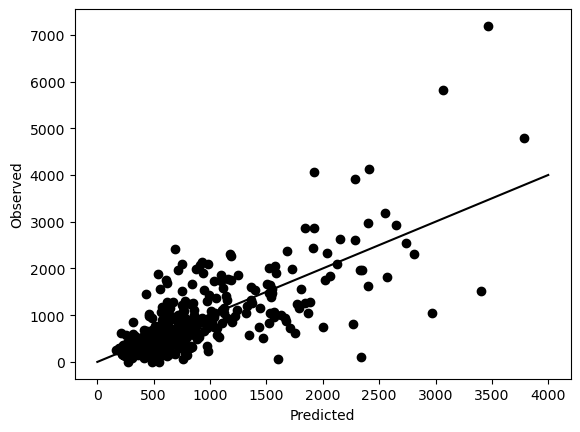

test data correlation coefficient is: 0.7568507457025871
train data correlation coefficient is: 0.9066681114170307


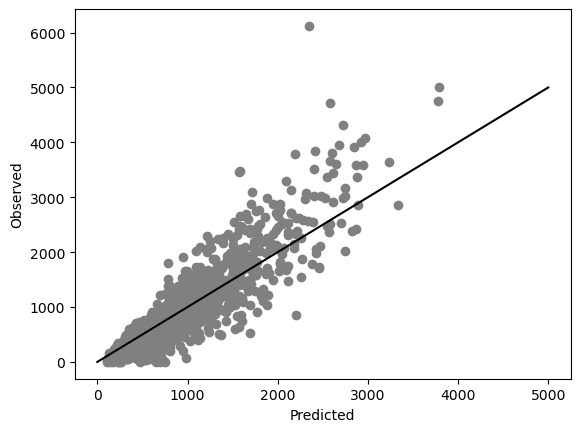

In [108]:
plt.scatter(y_pred, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 4000], [0, 4000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'gray')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [109]:
##k-fold cross validation; random forest

##ORIGINAL PREDICTORS:
# predictors = df1[
#     [
#         'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'Elevation', 'tmax', 'tmin', 'DOY', 'ndvi_augoct',
#         'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct',
#         'ndvi_sepoct','savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct', 'nd_swir2_nir_sepoct', 
#         'nd_swir2_r_sepoct','ndvi_octnov','savi_octnov','wdrvi5_octnov','nd_r_g_octnov','nd_g_b_octnov',
#         'nd_swir2_nir_octnov', 'nd_swir2_r_octnov','ndvi_yr','savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr',
#         'nd_swir2_nir_yr', 'nd_swir2_r_yr'
#     ]
# ]

# targets = df1['Plant_Biomass'] 

#Predictors below are based on feature selection - most important variables

predictors = xargs

targets = df1['Plant_Biomass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
# from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

#Old predictors:
#'Percent_flooding','flats','Elevation', 'nd_swir2_nir_peak','dayl_daymMarMay', 'wdrvi5_peak', 'ndvi_peak', 
#'nd_swir2_nir', 'dayl_Max', 'dayl_Min','tmax_peak',
#'srad_peak', 'savi', 'evi','nd_swir2_nir_year', 'nd_g_b','Green_band_year','SWIR1_band_peak','SWIR2_band_peak',
#'evi_peak','ndvi_prcp_interaction'

{'fit_time': array([17.02931595, 17.21200252, 17.10458827, 16.71114588, 16.90276575,
        16.78545856, 17.54241323, 17.46072841, 16.35686111, 17.16616106]),
 'score_time': array([0.01550317, 0.00432348, 0.01495838, 0.01232362, 0.01554775,
        0.01549792, 0.01493931, 0.01625586, 0.01547027, 0.01552296]),
 'test_r2': array([0.36839038, 0.38467503, 0.62541077, 0.41195819, 0.60442019,
        0.45970912, 0.57141726, 0.6623209 , 0.57603963, 0.52863129]),
 'test_neg_root_mean_squared_error': array([-553.18099982, -500.70882649, -479.57546134, -597.09168729,
        -494.85131424, -565.94939967, -576.32401154, -384.33685821,
        -484.44456688, -435.28873119])}

In [110]:
#Feature importance and average RMSE
x = pd.DataFrame(cv_results)
print(x['test_r2'].mean())
print(x['test_neg_root_mean_squared_error'].mean())
print('NRSME is: ' + str(x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

0.5192972746883238
-507.175185668194
NRSME is: -0.07054454172015175


In [53]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = xargs_train.copy().dropna()
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

In [72]:
##Feature selection
import time
import numpy as np

feature_importances = pipe.named_steps['forest'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': xargs.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(21))  # Keep the top 20 most important features

# pd.set_option('display.max_rows', None)
# print(feature_importance_df)

              Feature  Importance
0           Elevation    0.196954
1   nd_swir2_nir_peak    0.145268
2        nd_swir2_nir    0.108763
6           srad_peak    0.056154
3    Percent_flooding    0.054587
13      nd_g_b_MarMay    0.042801
8               flats    0.039074
7       NIR_band_year    0.037882
4            dayl_Max    0.032518
15      Red_band_year    0.030538
14               savi    0.028773
17    SWIR1_band_year    0.028502
5            dayl_Min    0.027605
10          ndvi_peak    0.025777
16  nd_swir2_nir_year    0.025068
9         wdrvi5_peak    0.024960
19          Blue_band    0.024663
18             nd_g_b    0.024237
12        swe_rolling    0.023334
11    dayl_daymMarMay    0.022543


In [73]:
print(len(yargs))

##More work to do

2036


<AxesSubplot:xlabel='Percent_flooding', ylabel='Plant_Biomass'>

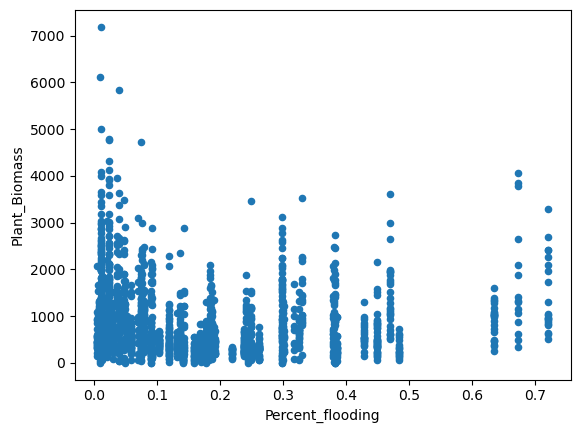

In [74]:
g = df1.plot(kind = 'scatter', x = 'Percent_flooding', y = 'Plant_Biomass')

g

In [85]:
# ##xgboost
# from xgboost import XGBClassifier, XGBRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# ## split data into X and y
# xargs = df1[
#     [
#         'Percent_flooding',
        
#         'flats',
        
#         'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'evi',
#         'Blue_band','Green_band','Red_band','NIR_band','SWIR1_band','SWIR2_band',
        
#         'ndvi_MarMay', 'nd_swir2_r_MarMay', 'nd_swir2_nir_MarMay', 'nd_g_b_MarMay','wdrvi5_MarMay', 'savi_MarMay', 'evi_MarMay',
#         'Blue_band_MarMay','Green_band_MarMay','Red_band_MarMay','NIR_band_MarMay','SWIR1_band_MarMay','SWIR2_band_MarMay',
        
#         'ndvi_year', 'nd_swir2_r_year', 'nd_swir2_nir_year', 'nd_g_b_year','wdrvi5_year', 'savi_year', 'evi_year',
#         'Blue_band_year','Green_band_year','Red_band_year','NIR_band_year','SWIR1_band_year','SWIR2_band_year',
        
#         'ndvi_peak', 'nd_swir2_r_peak', 'nd_swir2_nir_peak', 'nd_g_b_peak','wdrvi5_peak', 'savi_peak', 'evi_peak',
#         'Blue_band_peak','Green_band_peak','Red_band_peak','NIR_band_peak','SWIR1_band_peak','SWIR2_band_peak',

#         'Elevation', 
        
#         'dayl_daymMarMay', 'prcp_daymMarMay', 'srad_daymMarMay', 'swe_daymMarMay', 'tmax_daymMarMay', 'tmin_daymMarMay',
#         'vp_daymMarMay',
        
#         'dayl_peak', 'prcp_peak', 'srad_peak', 'swe_peak', 'tmax_peak', 'tmin_peak',
#         'vp_peak',        
        
#         'dayl_Min', 'prcp_Min', 'srad_Min', 'swe_Min', 'tmax_Min', 'tmin_Min',
#         'vp_Min',
        
#         'dayl_Max', 'prcp_Max', 'srad_Max', 'swe_Max', 'tmax_Max', 'tmin_Max',
#         'vp_Max',
        
#         'dayl_daymMayOct', 'prcp_daymMayOct', 'srad_daymMayOct', 'swe_daymMayOct', 'tmax_daymMayOct', 'tmin_daymMayOct',
#         'vp_daymMayOct',
        
#         'dayl_rolling', 'prcp_rolling', 'srad_rolling', 'swe_rolling', 'tmax_rolling', 'tmin_rolling',
#         'vp_rolling',
        
#         'pdsi_MarMay', 'spei30d_MarMay', 'spei90d_MarMay', 'spei180d_MarMay', 'spei1y_MarMay', 'spei5y_MarMay',
        
#         'pdsi_gridmet', 'spei30d_gridmet', 'spei90d_gridmet', 'spei180d_gridmet', 'spei1y_gridmet', 'spei5y_gridmet',
        
#         'pdsi_Min', 'spei30d_Min', 'spei90d_Min', 'spei180d_Min', 'spei1y_Min', 'spei5y_Min',

#         'pdsi_Max', 'spei30d_Max', 'spei90d_Max', 'spei180d_Max', 'spei1y_Max', 'spei5y_Max'

#     ]
# ]

# yargs = df1['Plant_Biomass'] 

# ## split data into train and test sets
# size_x = 0.2
# seed = 3
# x_xg_train, x_xg_test, y_xg_train, y_xg_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed)

# ##Feature Scaling 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_xg_train = sc.fit_transform(x_xg_train)
# x_xg_test = sc.transform(x_xg_test)

# ##fit model no training data
# xg_reg = XGBRegressor()
# xg_reg.fit(x_xg_train, y_xg_train)

# ##make predictions for test data
# y_xg_pred = xg_reg.predict(x_xg_test)
# # predictions = [round(value) for value in y_pred]

# ##evaluate predictions

# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_xg_test, y_xg_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_xg_test, y_xg_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_xg_test, y_xg_pred)))

# r_square = metrics.r2_score(y_xg_test, y_xg_pred)
# print(r_square)
# # print(reg_x.score(x_xg_test, y_xg_test))

# # accuracy = accuracy_score(yargs_test, predictions)
# # print("Accuracy: %.2f%%" % (accuracy * 100.0))

Mean Absolute Error: 364.4063855646919
Mean Squared Error: 379261.7081432934
Root Mean Squared Error: 615.8422753784392
0.4070549697633863


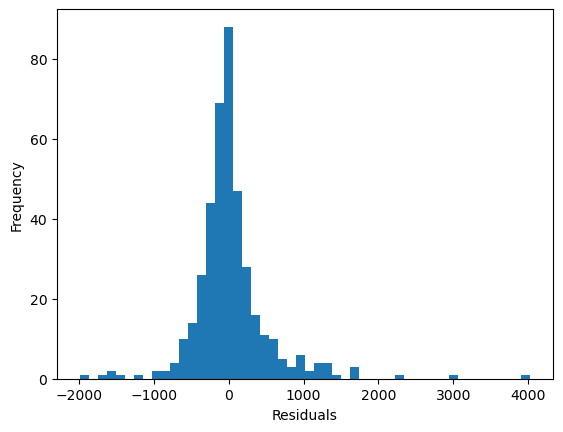

In [57]:
import matplotlib.pyplot as plt
residuals = yargs_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# plt.scatter(yargs_test, y_pred)
# plt.xlabel("Actual Biomass")
# plt.ylabel("Predicted Biomass")
# plt.plot([min(yargs_test), max(yargs_test)], [min(yargs_test), max(yargs_test)], 'r--')
# plt.show()

In [106]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'forest__n_estimators': [50, 100, 200, 300, 500, 1000],
    'forest__max_depth': [10, 20, 30, None],
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=seed)
rf_search.fit(xargs_train, yargs_train)

print("Best Params:", rf_search.best_params_)
pipe = rf_search.best_estimator_

Best Params: {'forest__n_estimators': 200, 'forest__min_samples_split': 10, 'forest__min_samples_leaf': 2, 'forest__max_depth': 30}


In [46]:
#Fin
